In [8]:
import pandas as pd
from io import StringIO
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML

# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199

plt.rcParams.update({'font.size': 22, "axes.facecolor" : "white",}) # must set in top
plt.rcParams["figure.facecolor"] = 'w'
# plt.style.use("bmh")
# plt.rcParams.update({"figure.figsize" : (12, 8),
#                      "axes.facecolor" : "white",
#                      "axes.edgecolor":  "black"})


# Create an modifiable version of the responses, which is updated with new rows if a row is added to the original, the modifiable version can be used to clean the data and add additional columns 

In [64]:

def update_mod_sheet():

    response_df = pd.read_excel(open('Evaluation of uses and needs for microbial data analysis in Galaxy (Responses).xlsx', 'rb'), sheet_name='Form responses 1', index_col = "Timestamp") 
    mod_response_df = pd.read_excel(open('Mod.xlsx', 'rb'), sheet_name='Form responses 1', index_col = "Timestamp") 
    mod_response_df = mod_response_df.add_suffix('_mod')

    response_df_merged = pd.concat([response_df, mod_response_df], axis = 1)

    updated_mod_response_df = response_df_merged.loc[:,mod_response_df.columns]
    updated_mod_response_df.columns = updated_mod_response_df.columns.str.replace("_mod","")
    updated_mod_response_df.to_excel('Mod.xlsx', sheet_name='Form responses 1')

    return(response_df, updated_mod_response_df)

response_df, updated_mod_response_df = update_mod_sheet()

# Plot main target

Text(0.5, 1.0, 'What is your main target?')

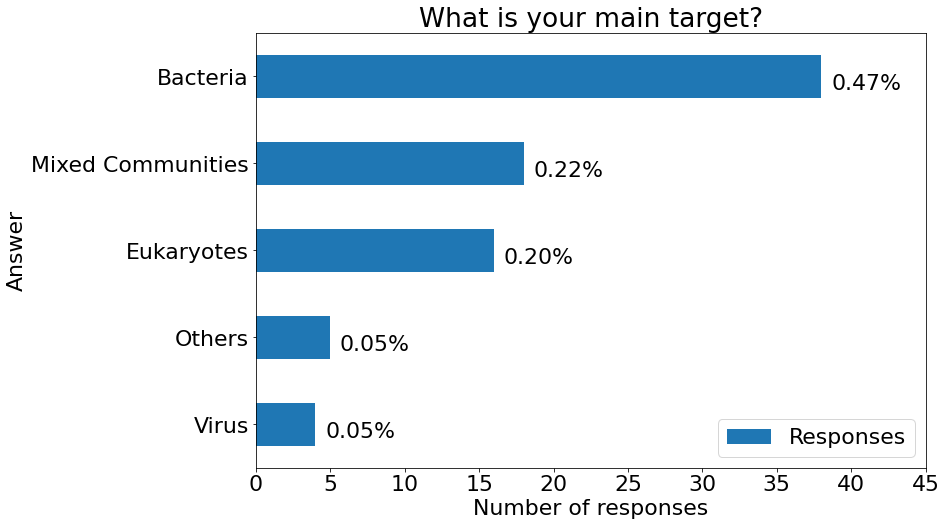

In [137]:
question = "What is your main target?"

sub_df = response_df.loc[:,question]

# get count
sub_df_count = sub_df.value_counts()
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 1)]
others = sliced_merged_df.sum()
others.name = "Others"
merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(12,8), y = "Responses")

for p, val in zip(ax.patches, merged_df['norm']):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val:.2f}%', (x + width + 3, y + 0.1), ha='center')

ax.set_xticks(np.arange(0, 50, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title(question)

# Plot technique

Text(0.5, 1.0, 'Which techniques do you use?')

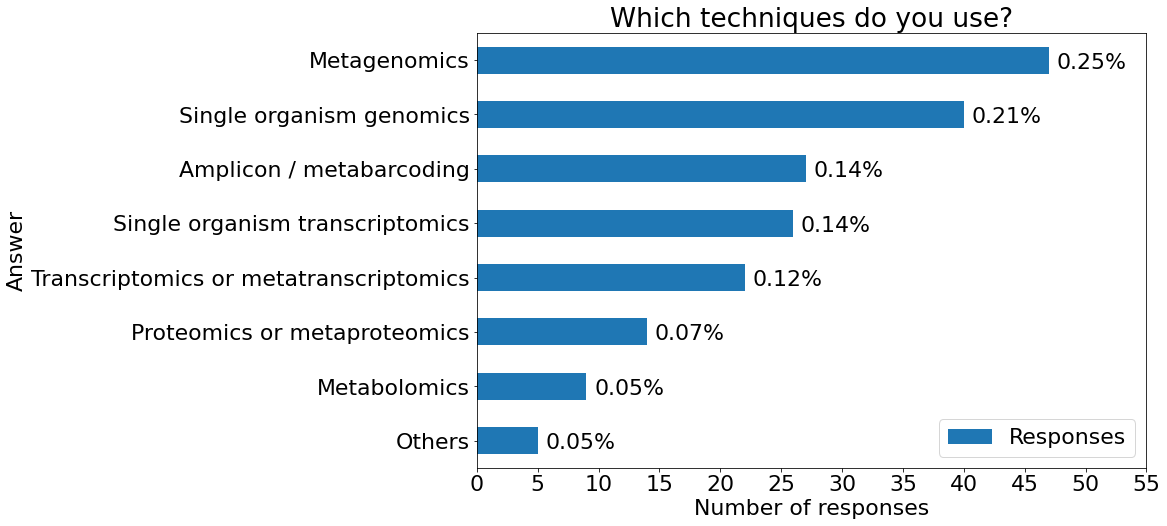

In [136]:


question = "Which techniques do you use?"
sub_df = response_df.loc[:,question]

# get count
sub_df_count = sub_df.str.get_dummies(sep=', ').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 1)]
others = sliced_merged_df.sum()
others.name = "Others"
merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(12,8), y = "Responses")

for p, val in zip(ax.patches, merged_df['norm']):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val:.2f}%', (x + width + 3.5, y + 0.1), ha='center')

ax.set_xticks(np.arange(0, 60, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title(question)

# Plot analysis

Text(0.5, 1.0, 'Which analysis do you use or would like to do?')

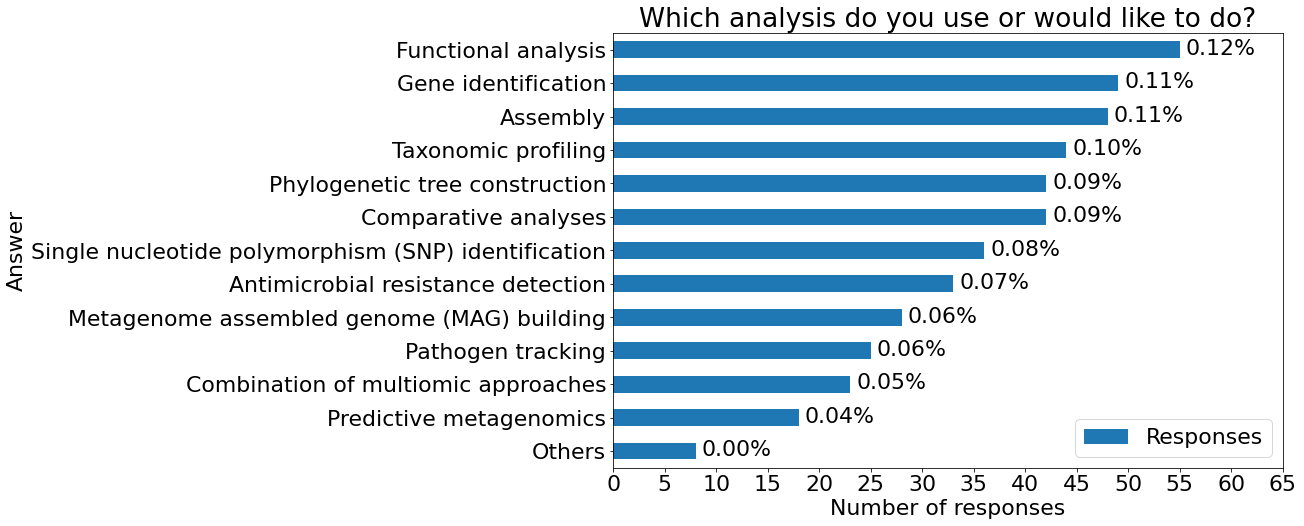

In [148]:
# analysis
replace_text = {
    "Taxonomic Profiling":"Taxonomic profiling",
    "MAGs building":"Metagenome assembled genome (MAG) building",
    "SNP identification": "Single nucleotide polymorphism (SNP) identification",
    "MAGs building": "Metagenome assembled genome (MAG) building",
    "Predictive Metagenomics": "Predictive metagenomics",
    "Functional Analysis":"Functional analysis",
}

def replace(val):
    for k, v in replace_text.items():
        val = val.replace(k, v)
    return(val)

question = "Which analysis do you use or would like to do?"
sub_df = response_df.loc[:,question]

# modify wrong text
sub_df = sub_df.dropna()
sub_df = sub_df.apply(replace)

# get count
sub_df_count = sub_df.str.get_dummies(sep=', ').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 1)]
others = sliced_merged_df.sum()
others.name = "Others"
merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(12,8), y = "Responses")

for p, val in zip(ax.patches, merged_df['norm']):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val:.02f}%', (x + width + 4, y + 0.1), ha='center')

ax.set_xticks(np.arange(0, 70, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title(question)

# print(ax.get_yticklabels())


# Plot tools

Text(0.5, 1.0, 'Which tools, platforms or databases are you using to conduct your research analyses ?')

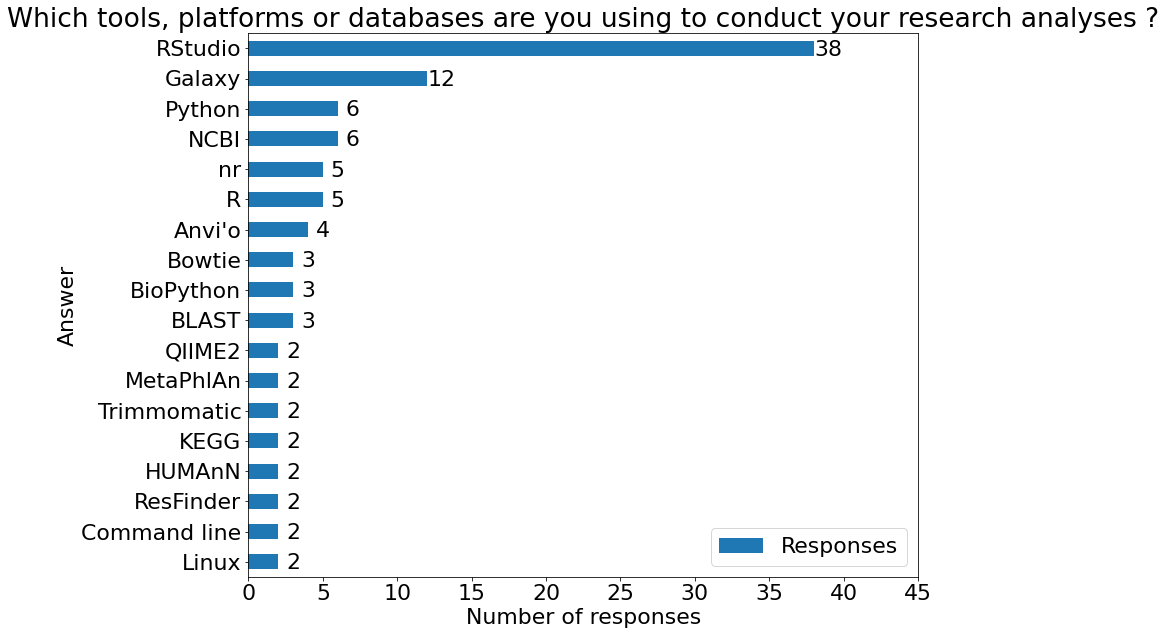

In [45]:
# tools
question = "Which tools, platforms or databases are you using to conduct your research analyses (e.g. Anvi’o, RStudio, nr, etc.)?"
sub_df = updated_mod_response_df.loc[:,question]

# get count
sub_df_count = sub_df.str.get_dummies(sep=', ').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 1)]
# others = sliced_merged_df.sum()
# others.name = "Others"
# merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(12,10), y = "Responses")

for p, val in zip(ax.patches, merged_df["Responses"]):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val}', (x + width + 1, y), ha='center')

ax.set_xticks(np.arange(0, 50, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title("Which tools, platforms or databases are you using to conduct your research analyses ?")


# for tick in ax.get_yticklabels():
#     print(tick)


Text(0.5, 1.0, 'Availability of tools in Galaxy')

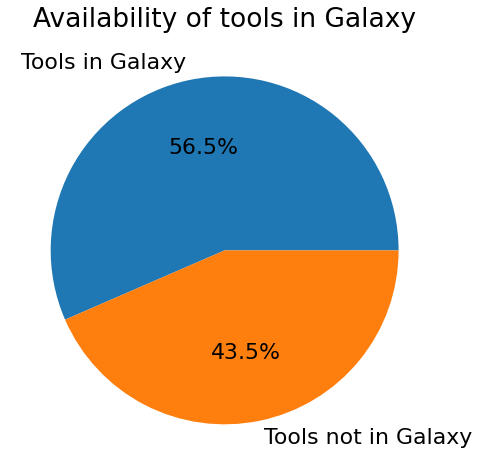

In [42]:
# How many of the used tools are in galaxy ?

tools_in_galaxy = updated_mod_response_df.loc[:,"In Galaxy"].sum()
tools_not_galaxy = updated_mod_response_df.loc[:,"Not in Galaxy"].sum()

labels = ['Tools in Galaxy', 'Tools not in Galaxy']
sizes = [tools_in_galaxy, tools_not_galaxy]

fig, ax = plt.subplots(figsize=(12,8), facecolor='w')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title("Availability of tools in Galaxy")

# How often do you use Galaxy?

Text(0, 0.5, '')

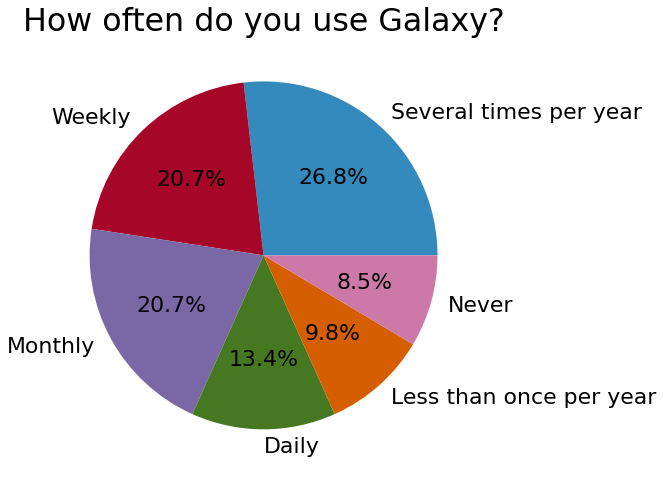

In [22]:
question = "How often do you use Galaxy?"

sub_df = response_df.loc[:,question]

# get count
sub_df_count = sub_df.value_counts()
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

ax = merged_df.plot.pie(y = "Responses", figsize=(12,8), legend=False, autopct= '%.1f%%')
ax.set_title("How often do you use Galaxy?")

ax.set_facecolor("white")
ax.set_ylabel('')

# If you never or rarely use Galaxy, what are the reasons?

Text(0.5, 1.0, 'If you never or rarely use Galaxy, what are the reasons?')

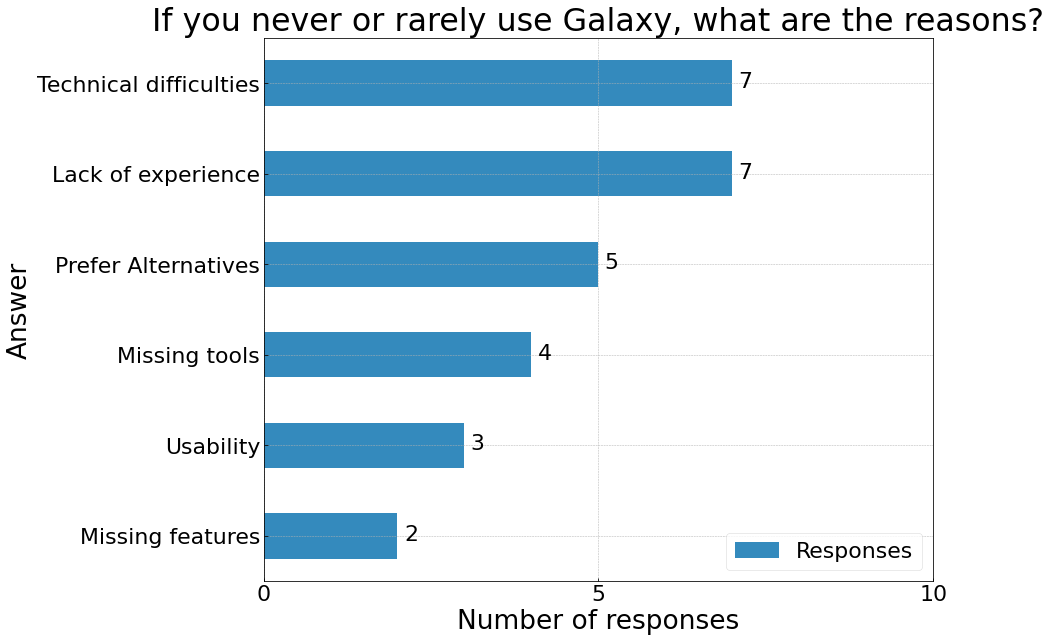

In [33]:
# tools
question = "Galaxy Obstacles"

sub_df = updated_mod_response_df.loc[:,question]

# get count
sub_df_count = sub_df.str.get_dummies(sep=', ').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 1)]
# others = sliced_merged_df.sum()
# others.name = "Others"
# merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(12,10), y = "Responses")

for p, val in zip(ax.patches, merged_df["Responses"]):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val}', (x + width + 0.2, y + 0.2), ha='center')

ax.set_xticks(np.arange(0, 15, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title("If you never or rarely use Galaxy, what are the reasons?")

# Which Galaxy server(s) do you use?

[ True  True  True  True False  True False False False False False False
 False]
Local Galaxy instance       7
galaxy-sigenae Toulouse     1
galaxytrakr.org             3
usegalaxy.eu               55
usegalaxy.fr                3
usegalaxy.no                1
usegalaxy.org              28
usegalaxy.org.au           24
Name: Responses, dtype: int64


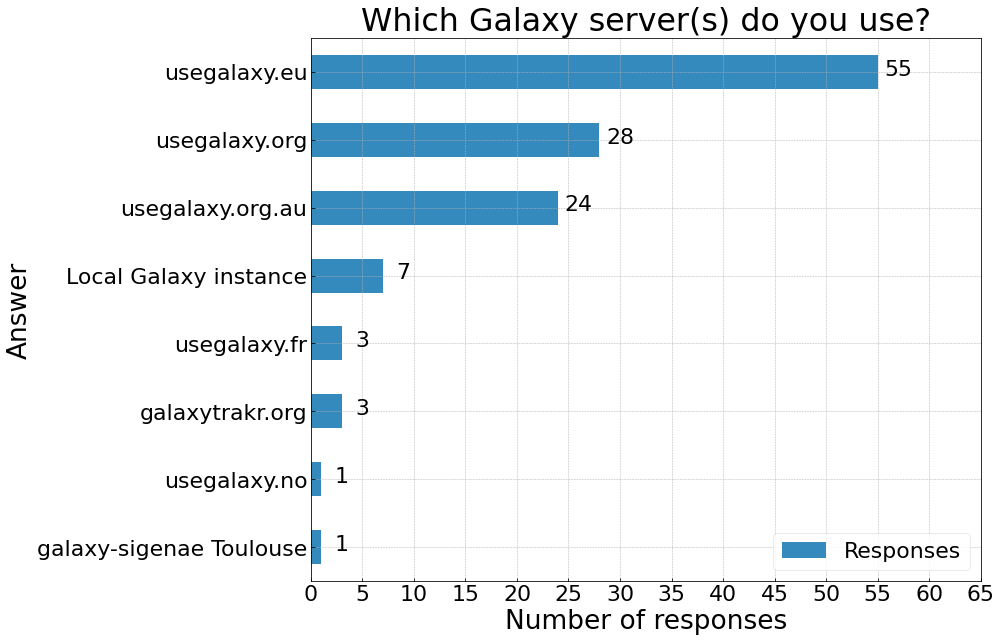

In [59]:
response_df, response_df_merged = update_mod_sheet()
question = "Which Galaxy server(s) do you use?"

sub_df = updated_mod_response_df.loc[:,question]

# get count
sub_df_count = sub_df.str.get_dummies(sep=', ').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

drop_instance = ["Galaxy Europe", "Main", "Galaxy Australia", "Galaxy Norway", "Galaxy France"]

print(sub_df_count.index.isin(drop_instance))

sub_df_count = sub_df_count[~sub_df_count.index.isin(drop_instance)]
print(sub_df_count)

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 0)]
# others = sliced_merged_df.sum()
# others.name = "Others"
# merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(12,10), y = "Responses")

for p, val in zip(ax.patches, merged_df["Responses"]):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val}', (x + width + 2, y + 0.2), ha='center')

ax.set_xticks(np.arange(0, 70, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title("Which Galaxy server(s) do you use?")
ax.legend(loc="lower right")

# Which training resources are you using?

Text(0.5, 1.0, 'Which training resources are you using?')

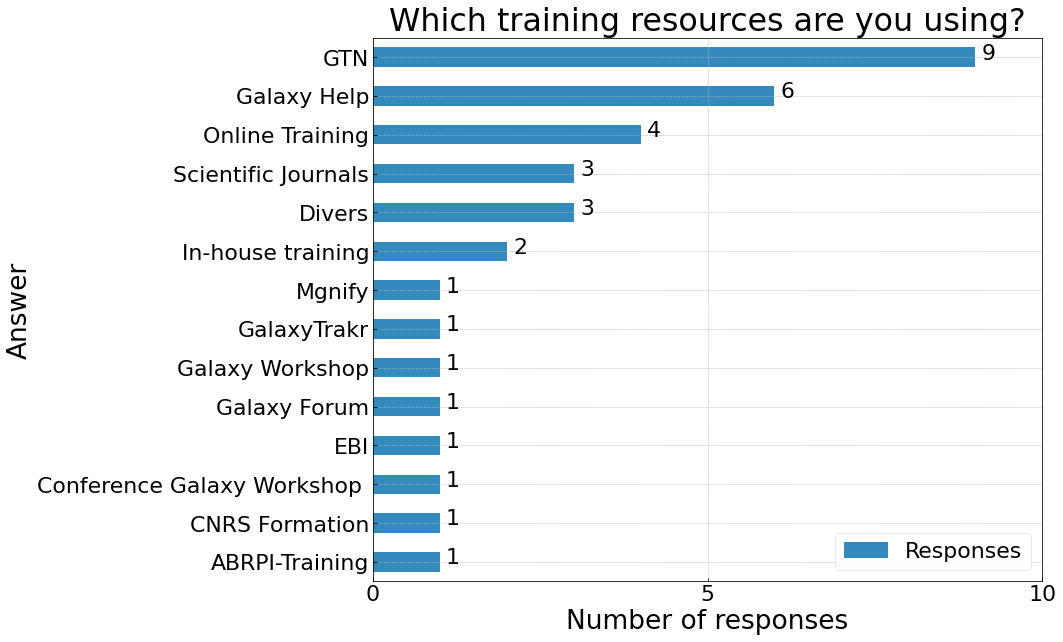

In [66]:
# tools
response_df, response_df_merged = update_mod_sheet()
question = "Training resources?"

sub_df = updated_mod_response_df.loc[:,question]

# get count
sub_df_count = sub_df.str.get_dummies(sep=', ').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 0)]
# others = sliced_merged_df.sum()
# others.name = "Others"
# merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(12,10), y = "Responses")

for p, val in zip(ax.patches, merged_df["Responses"]):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val}', (x + width + 0.2, y + 0.2), ha='center')

ax.set_xticks(np.arange(0, 15, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title("Which training resources are you using?")

# Which country are you based in?

Text(0.5, 1.0, 'Which country are you based in?')

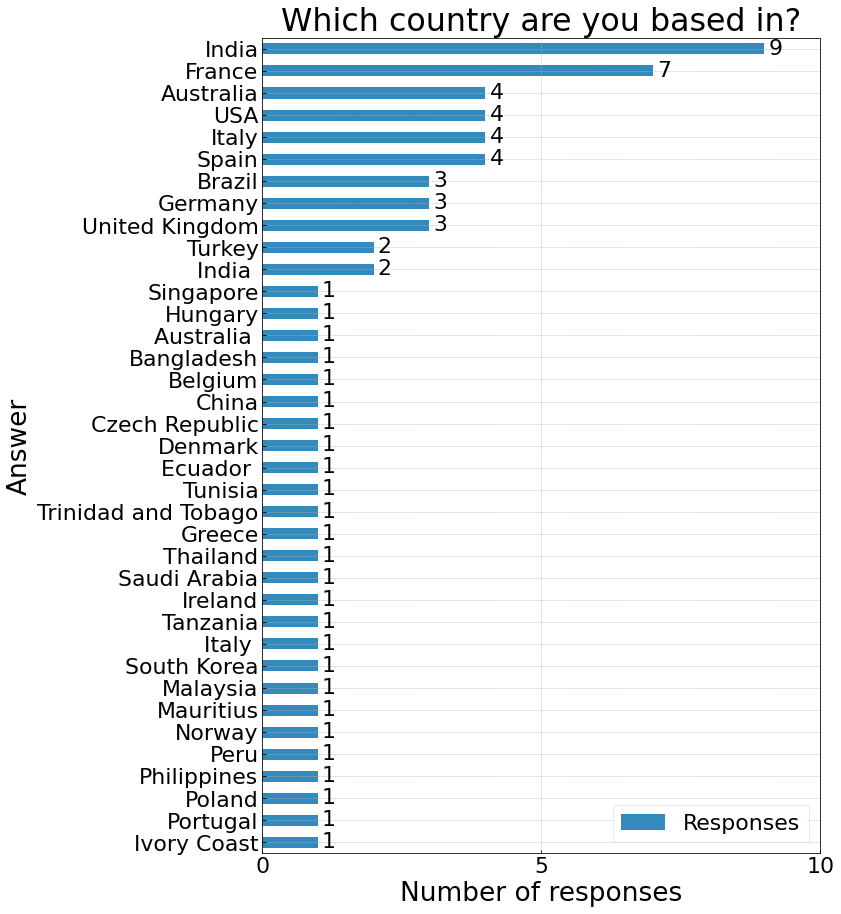

In [114]:
# tools
response_df, updated_mod_response_df = update_mod_sheet()
question = "Which country are you based in?"

sub_df = updated_mod_response_df.loc[:,question]

# get count
sub_df_count = sub_df.str.get_dummies(sep=', ').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 0)]
# others = sliced_merged_df.sum()
# others.name = "Others"
# merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(10,15), y = "Responses")

for p, val in zip(ax.patches, merged_df["Responses"]):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val}', (x + width + 0.2, y ), ha='center')

ax.set_xticks(np.arange(0, 15, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title(question)

Text(0, 0.5, '')

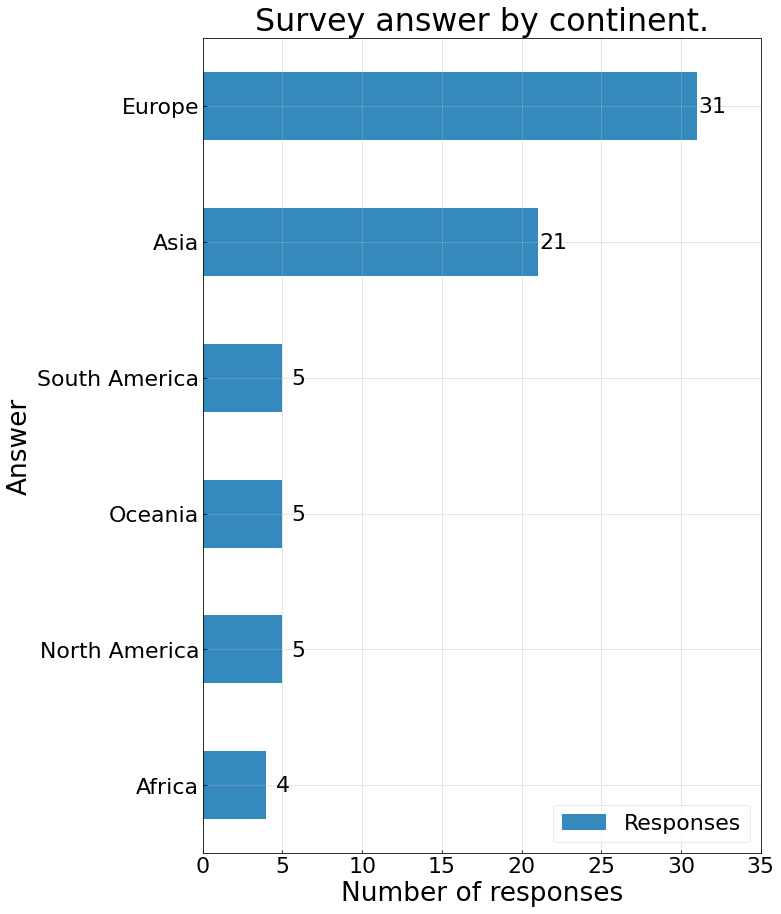

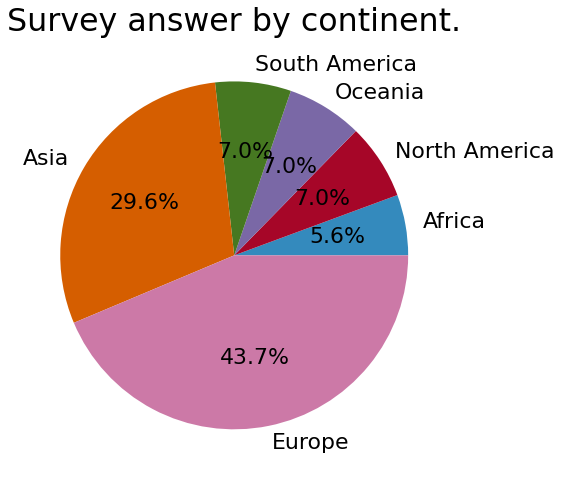

In [113]:
# continent

import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

response_df, updated_mod_response_df = update_mod_sheet()
question = "Which country are you based in?"

sub_df = updated_mod_response_df.loc[:,question]

def convert_to_continent(val):

    new_val = []
    for v in val.split(','):
        v = v.strip(' ')
        try:
            v = country_to_continent(v)
        except:
            v = 'Unknown'
        new_val.append(v)
    new_val = ','.join(new_val)
    #print(val, new_val)
    return(new_val)    
    
sub_df = sub_df.dropna()
sub_df = sub_df.apply(convert_to_continent)

# get count
sub_df_count = sub_df.str.get_dummies(sep=',').sum() #convert multiple answers to counts
sub_df_count.name = "Responses"

# get percentage
merged_df = pd.DataFrame(sub_df_count)
merged_df['norm'] = merged_df["Responses"]/merged_df["Responses"].sum()
merged_df['norm'] = merged_df['norm'].round(2)

# merge low occurences into "Others"
sliced_merged_df = merged_df.loc[(merged_df["Responses"] == 0)]
# others = sliced_merged_df.sum()
# others.name = "Others"
# merged_df = merged_df.append(others)
merged_df = merged_df.drop(sliced_merged_df.index)

#customize plot
merged_df = merged_df.sort_values(by = "Responses")
ax = merged_df.plot.barh(figsize=(10,15), y = "Responses")

for p, val in zip(ax.patches, merged_df["Responses"]):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{val}', (x + width + 1, y + 0.2), ha='center')

ax.set_xticks(np.arange(0, 40, 5))
ax.set_xlabel("Number of responses")
ax.set_ylabel("Answer")
ax.set_title("Survey answer by continent.")

ax = merged_df.plot.pie(y = "Responses", figsize=(12,8), legend=False, autopct= '%.1f%%')
ax.set_title("Survey answer by continent.")

ax.set_facecolor("white")
ax.set_ylabel('')